In [1]:
import mysql.connector as conn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
cn_var = conn.connect(host = "localhost", user = "root", password = "")
cursor = cn_var.cursor(buffered = True)

In [3]:
cursor.execute('show databases')
cursor.fetchall()

[('employee',),
 ('glassdb',),
 ('imdb',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('saleswalmart',),
 ('sffilmlocations',),
 ('sys',)]

In [4]:
cursor.execute('create database if not exists SalesWalmart')

In [5]:
cursor.execute('show databases')
cursor.fetchall()

[('employee',),
 ('glassdb',),
 ('imdb',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('saleswalmart',),
 ('sffilmlocations',),
 ('sys',)]

In [6]:
cursor.execute('use saleswalmart')

In [7]:
cursor.execute('create table if not exists saleswalmart.wmsales(invoice_id varchar(50) not null primary key, branch varchar(5) not null, city varchar(30), customer_type varchar(50) not null, gender varchar(50) not null, product_line varchar(50) not null, unit_price decimal(10,2) not null, quantity int not null, vat float(6,4) not null, total decimal(12,4) not null, date datetime not null, time TIME not null, payment_method varchar(15) not null, cogs decimal(10,2) not null, gross_margin_pct float(11,9), gross_income decimal(12,4) not null, rating float(2,1))')

In [8]:
cursor.execute('select * from saleswalmart.wmsales')
cursor.fetchall()

[('102-69-7480',
  'C',
  'Kochi',
  'Member',
  'Female',
  'Books',
  Decimal('82.48'),
  9,
  37.116,
  Decimal('779.4360'),
  datetime.datetime(2019, 11, 7, 0, 0),
  datetime.timedelta(seconds=46715),
  'Walmart Gift Cards',
  Decimal('742.32'),
  4.761904716,
  Decimal('37.1160'),
  7.9),
 ('104-39-8395',
  'B',
  'Mumbai',
  'Normal',
  'Female',
  'Books',
  Decimal('61.58'),
  7,
  21.553,
  Decimal('452.6130'),
  datetime.datetime(2022, 9, 25, 0, 0),
  datetime.timedelta(seconds=3315),
  'Credit Card',
  Decimal('431.06'),
  4.761904716,
  Decimal('21.5530'),
  4.4),
 ('104-43-6544',
  'D',
  'Kochi',
  'Member',
  'Female',
  'Food and beverages',
  Decimal('29.41'),
  9,
  13.2345,
  Decimal('277.9245'),
  datetime.datetime(2017, 10, 15, 0, 0),
  datetime.timedelta(seconds=462),
  'Walmart Gift Cards',
  Decimal('264.69'),
  4.761904716,
  Decimal('13.2345'),
  6.1),
 ('104-83-9782',
  'D',
  'Agra',
  'Member',
  'Male',
  'Clothing',
  Decimal('30.03'),
  7,
  10.5105,
  D

In [9]:
cursor.execute('select date, dayname(date) from saleswalmart.wmsales')
cursor.fetchall()

[(datetime.datetime(2019, 11, 7, 0, 0), 'Thursday'),
 (datetime.datetime(2022, 9, 25, 0, 0), 'Sunday'),
 (datetime.datetime(2017, 10, 15, 0, 0), 'Sunday'),
 (datetime.datetime(2015, 8, 16, 0, 0), 'Sunday'),
 (datetime.datetime(2023, 8, 17, 0, 0), 'Thursday'),
 (datetime.datetime(2023, 3, 31, 0, 0), 'Friday'),
 (datetime.datetime(2017, 9, 26, 0, 0), 'Tuesday'),
 (datetime.datetime(2016, 3, 30, 0, 0), 'Wednesday'),
 (datetime.datetime(2021, 11, 7, 0, 0), 'Sunday'),
 (datetime.datetime(2020, 12, 7, 0, 0), 'Monday'),
 (datetime.datetime(2019, 9, 13, 0, 0), 'Friday'),
 (datetime.datetime(2018, 3, 16, 0, 0), 'Friday'),
 (datetime.datetime(2022, 5, 21, 0, 0), 'Saturday'),
 (datetime.datetime(2022, 8, 30, 0, 0), 'Tuesday'),
 (datetime.datetime(2017, 10, 6, 0, 0), 'Friday'),
 (datetime.datetime(2016, 8, 19, 0, 0), 'Friday'),
 (datetime.datetime(2017, 2, 21, 0, 0), 'Tuesday'),
 (datetime.datetime(2015, 10, 7, 0, 0), 'Wednesday'),
 (datetime.datetime(2015, 10, 28, 0, 0), 'Wednesday'),
 (datetime.

In [35]:
cursor.execute('alter table wmsales add column day_name varchar(10);')

ProgrammingError: 1060 (42S21): Duplicate column name 'day_name'

In [36]:
cursor.execute('update wmsales set day_name = dayname(date)')

In [37]:
cursor.execute('select * from wmsales')
cursor.fetchall()

[('102-69-7480',
  'C',
  'Kochi',
  'Member',
  'Female',
  'Books',
  Decimal('82.48'),
  9,
  37.116,
  Decimal('779.4360'),
  datetime.datetime(2019, 11, 7, 0, 0),
  datetime.timedelta(seconds=46715),
  'Walmart Gift Cards',
  Decimal('742.32'),
  4.761904716,
  Decimal('37.1160'),
  7.9,
  'Thursday',
  'November'),
 ('104-39-8395',
  'B',
  'Mumbai',
  'Normal',
  'Female',
  'Books',
  Decimal('61.58'),
  7,
  21.553,
  Decimal('452.6130'),
  datetime.datetime(2022, 9, 25, 0, 0),
  datetime.timedelta(seconds=3315),
  'Credit Card',
  Decimal('431.06'),
  4.761904716,
  Decimal('21.5530'),
  4.4,
  'Sunday',
  'September'),
 ('104-43-6544',
  'D',
  'Kochi',
  'Member',
  'Female',
  'Food and beverages',
  Decimal('29.41'),
  9,
  13.2345,
  Decimal('277.9245'),
  datetime.datetime(2017, 10, 15, 0, 0),
  datetime.timedelta(seconds=462),
  'Walmart Gift Cards',
  Decimal('264.69'),
  4.761904716,
  Decimal('13.2345'),
  6.1,
  'Sunday',
  'October'),
 ('104-83-9782',
  'D',
  'Ag

In [38]:
cursor.execute('alter table wmsales add column month_name varchar(50)')

ProgrammingError: 1060 (42S21): Duplicate column name 'month_name'

In [39]:
cursor.execute('update wmsales set month_name = monthname(date)')

In [40]:
cursor.execute('select * from wmsales')
cursor.fetchall()

[('102-69-7480',
  'C',
  'Kochi',
  'Member',
  'Female',
  'Books',
  Decimal('82.48'),
  9,
  37.116,
  Decimal('779.4360'),
  datetime.datetime(2019, 11, 7, 0, 0),
  datetime.timedelta(seconds=46715),
  'Walmart Gift Cards',
  Decimal('742.32'),
  4.761904716,
  Decimal('37.1160'),
  7.9,
  'Thursday',
  'November'),
 ('104-39-8395',
  'B',
  'Mumbai',
  'Normal',
  'Female',
  'Books',
  Decimal('61.58'),
  7,
  21.553,
  Decimal('452.6130'),
  datetime.datetime(2022, 9, 25, 0, 0),
  datetime.timedelta(seconds=3315),
  'Credit Card',
  Decimal('431.06'),
  4.761904716,
  Decimal('21.5530'),
  4.4,
  'Sunday',
  'September'),
 ('104-43-6544',
  'D',
  'Kochi',
  'Member',
  'Female',
  'Food and beverages',
  Decimal('29.41'),
  9,
  13.2345,
  Decimal('277.9245'),
  datetime.datetime(2017, 10, 15, 0, 0),
  datetime.timedelta(seconds=462),
  'Walmart Gift Cards',
  Decimal('264.69'),
  4.761904716,
  Decimal('13.2345'),
  6.1,
  'Sunday',
  'October'),
 ('104-83-9782',
  'D',
  'Ag

In [21]:
# converting this table in pandas dataframe for a better view and plotting

In [8]:
db_url = 'mysql://root@localhost/saleswalmart'
engine = create_engine(db_url)

In [44]:
query = 'select * from saleswalmart.wmsales'
df = pd.read_sql(query, con=engine)
df

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,VAT,total,date,time,payment_method,cogs,gross_margin_pct,gross_income,rating,day_name,month_name
0,102-69-7480,C,Kochi,Member,Female,Books,82.48,9,37.1160,779.4360,2019-11-07,0 days 12:58:35,Walmart Gift Cards,742.32,4.761905,37.1160,7.9,Thursday,November
1,104-39-8395,B,Mumbai,Normal,Female,Books,61.58,7,21.5530,452.6130,2022-09-25,0 days 00:55:15,Credit Card,431.06,4.761905,21.5530,4.4,Sunday,September
2,104-43-6544,D,Kochi,Member,Female,Food and beverages,29.41,9,13.2345,277.9245,2017-10-15,0 days 00:07:42,Walmart Gift Cards,264.69,4.761905,13.2345,6.1,Sunday,October
3,104-83-9782,D,Agra,Member,Male,Clothing,30.03,7,10.5105,220.7205,2015-08-16,0 days 07:27:52,Credit Card,210.21,4.761905,10.5105,4.3,Sunday,August
4,105-67-1251,C,Chennai,Member,Female,Home and lifestyle,49.31,2,4.9310,103.5510,2023-08-17,0 days 01:12:52,Credit Card,98.62,4.761905,4.9310,7.7,Thursday,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,993-77-6754,B,Kolkata,Member,Female,Sports and travel,58.53,5,14.6325,307.2825,2018-01-17,0 days 22:40:00,Credit Card,292.65,4.761905,14.6325,7.5,Wednesday,January
991,996-43-7086,B,Nashik,Member,Female,Clothing,48.31,9,21.7395,456.5295,2022-04-22,0 days 08:16:02,Cash,434.79,4.761905,21.7395,9.8,Friday,April
992,998-17-3152,B,Vishakhapatnam,Normal,Female,Electronic accessories,58.10,10,29.0500,610.0500,2015-11-06,0 days 14:16:02,Cash,581.00,4.761905,29.0500,5.7,Friday,November
993,999-04-9521,A,Lucknow,Normal,Male,Electronic accessories,79.65,3,11.9475,250.8975,2016-07-19,0 days 20:41:50,Ewallet,238.95,4.761905,11.9475,4.7,Tuesday,July


In [43]:
df.shape

(995, 19)

In [26]:
df.describe()

,unit_price,quantity,VAT,total,date,time,cogs,gross_margin_pct,gross_income,rating
count,995.000000,995.000000,995.000000,995.000000,995,995,995.000000,9.950000e+02,995.000000,995.000000
mean,54.418623,5.546734,14.914557,313.205692,2019-07-01 06:37:59.396984832,0 days 11:34:19.754773869,298.291136,4.761905e+00,14.914557,5.663216
min,10.020000,1.000000,0.501000,10.521000,2015-01-13 00:00:00,0 days 00:00:32,10.020000,4.761905e+00,0.501000,1.000000
25%,31.640000,3.000000,5.918000,124.278000,2017-03-18 00:00:00,0 days 05:26:03,118.360000,4.761905e+00,5.918000,3.500000
50%,53.960000,6.000000,12.325500,258.835500,2019-07-11 00:00:00,0 days 11:18:35,246.510000,4.761905e+00,12.325500,5.700000
75%,77.065000,8.000000,21.719750,456.114750,2021-10-12 12:00:00,0 days 17:46:19.500000,434.395000,4.761905e+00,21.719750,8.000000
max,99.970000,10.000000,49.930000,1048.530000,2023-12-30 00:00:00,0 days 23:58:04,998.600000,4.761905e+00,49.930000,9.900000
std,26.243570,2.912641,11.037942,231.796786,NaN,0 days 07:00:49.382577031,220.758844,1.866113e-14,11.037942,2.608852


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   invoice_id        995 non-null    object         
 1   branch            995 non-null    object         
 2   city              995 non-null    object         
 3   customer_type     995 non-null    object         
 4   gender            995 non-null    object         
 5   product_line      995 non-null    object         
 6   unit_price        995 non-null    float64        
 7   quantity          995 non-null    int64          
 8   VAT               995 non-null    float64        
 9   total             995 non-null    float64        
 10  date              995 non-null    datetime64[ns] 
 11  time              995 non-null    timedelta64[ns]
 12  payment_method    995 non-null    object         
 13  cogs              995 non-null    float64        
 14  gross_marg

In [28]:
# to check how many distinct cities are there

query = 'select distinct city from wmsales'
df = pd.read_sql(query, con=engine)
df

,city
0,Kochi
1,Mumbai
2,Agra
3,Chennai
4,Vadodara
5,New Delhi
6,Kolkata
7,Nagpur
8,Hyderabad
9,Bhopal


In [30]:
# to check in which city is each branch

query = 'SELECT DISTINCT city, branch FROM wmsales'
df = pd.read_sql_query(query, con=engine)
df

,city,branch
0,Kochi,C
1,Mumbai,B
2,Kochi,D
3,Agra,D
4,Chennai,C
...,...,...
95,Kolkata,D
96,Surat,A
97,Agra,C
98,Lucknow,B


In [31]:
#to check how many product line are there. product line is nothing but categories

query = 'SELECT count(distinct product_line) as product_line from wmsales' 
df = pd.read_sql_query(query, con=engine)
df

,product_line
0,7


In [9]:
# to check what is the most selling product line

query = 'SELECT product_line, count(product_line) as cnt from wmsales group by product_line order by cnt desc limit 5'
df = pd.read_sql_query(query, con=engine)
df

,product_line,cnt
0,Health and beauty,160
1,Food and beverages,153
2,Sports and travel,145
3,Electronic accessories,143
4,Books,137


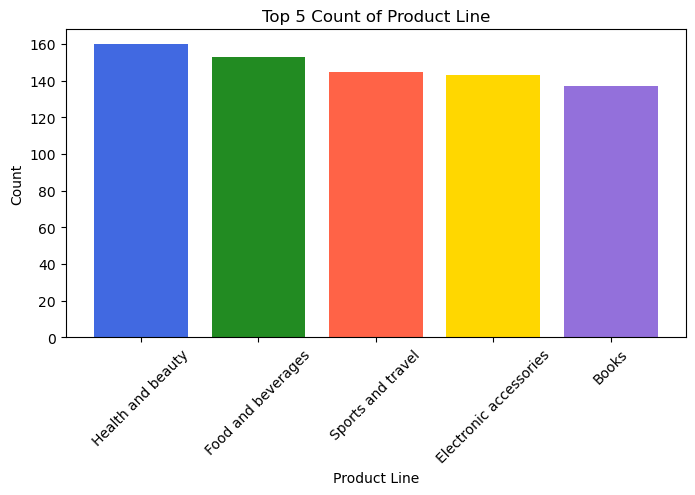

In [11]:
colors = ['royalblue', 'forestgreen', 'tomato', 'gold', 'mediumpurple']

plt.figure(figsize=(8,4))
plt.bar(df['product_line'], df['cnt'], color = colors)
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.title('Top 5 Count of Product Line')
plt.xticks(rotation = 45)
plt.show()

In [12]:
# to check the most common payment method

query = 'select payment_method, count(payment_method) as cnt from wmsales group by payment_method order by cnt desc'
df = pd.read_sql(query, con = engine)
df

,payment_method,cnt
0,Cash,265
1,Ewallet,257
2,Walmart Gift Cards,245
3,Credit Card,228


In [24]:
# to check total revenue by month from most sell to least

query = 'select month_name as month, sum(total) as Total_Revenue from wmsales group by month_name order by Total_Revenue desc'
df = pd.read_sql(query, con=engine)
df

,month,Total_Revenue
0,October,29612.1735
1,July,28844.6865
2,September,28794.4230
3,April,28763.9520
4,March,28755.9195
5,December,27916.6230
6,November,25545.0825
7,June,25378.5840
8,August,24859.7370
9,May,24408.5310


In [45]:
import plotly.express as px

fig = px.line(df, x='month', y='Total_Revenue', markers=True, line_shape='linear', text=df['Total_Revenue'])

fig.update_traces(textposition='top center', hoverinfo='x+y')

fig.update_layout(
    title='Top 5 Total Revenue by Month',
    xaxis_title='Month',
    yaxis_title='Total Revenue'
)

fig.show()

In [20]:
# to check the month having largest cogs (note that least the cogs more the profit for business, a higher cogs indicates trouble)

query = 'select month_name as month, sum(cogs) as cogs from wmsales group by month_name order by cogs desc'
df = pd.read_sql(query, con=engine)
df

,month,cogs
0,October,28202.07
1,July,27471.13
2,September,27423.26
3,April,27394.24
4,March,27386.59
5,December,26587.26
6,November,24328.65
7,June,24170.08
8,August,23675.94
9,May,23246.22
